In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, cross_val_score


### Previsão de Câncer de Pulmão

Nesta previsão, escolhi XGBoost como classificador, pois se trata de um algoritmo baseado em árvore de decisão e de alta precisão. Como vimos na EDA, tratam-se de informações que, quando dividimos os grupos, trazem a maioria uma divisão aproximada de 50/50. Isso explica a motivação por trás da escolha do XGBoost.

Depois de feita a análise exploratória, vamos carregar novamente o arquivo pré-processar alguns dados aqui mesmo, pois serão poucos, já que geralmente esse tipo de algoritmo não requer tanto pré-processamento.

In [3]:
df = pd.read_json(r'C:\Users\JUAN\Desktop\.begin\tudo\vscode\projects_files\github\lung_cancer_predict\data\dataset.json')

In [4]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


### Legendas

    Gender: Sexo.
    Age: Idade.
    Smoking: Fumante ou não.
    Yellow Fingers: Se o indivíduo tem dedos amarelos ou não.
    Anxiety: Se o sujeito possui comportamento ansioso ou não.
    Peer pressure: Pressão dos colegas.
    Chronic Disease: Doenças crônicas.
    Fatigue: Fadiga.
    Allergy: Alergia.
    Wheezing: Um assobio agudo durante a respiração.
    Alcohol Consuming: Ingere bebidas alcoólicas ou não.
    Coughing: Tosse.
    Shortness of breath: Falta de ar.
    Swallowing Difficulty: Dificuldade para engolir.
    Chest pain: Dor no peito.
    Lung Cancer: Cancer  de pulmão.


Para facilitar a comunicação com o classificador, vamos subistituir esses dados com 1, 2 para 0, 1 (binária)


In [5]:
df = df.replace(1, 0)
df = df.replace(2, 1)

In [6]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,1,0,0,1,1,0,0,0,0,1,0,0,1,NO
2996,F,75,0,1,0,0,0,1,1,1,1,0,0,1,0,NO
2997,F,62,1,1,1,0,1,1,1,1,0,0,1,1,1,YES
2998,M,30,0,0,1,1,1,1,1,1,1,0,1,0,1,YES


Precisamos modificar essas strings, vamos subistituir esses dados com 'yes', 'no' ou 'M', 'F' para 0, 1 (binária)

In [7]:
df['GENDER'] = df['GENDER'].replace('M', 1)
df['GENDER'] = df['GENDER'].replace('F', 0)
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('YES', 1)
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('NO', 0)

df

C:\Users\JUAN\AppData\Local\Temp\ipykernel_14156\3452704026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace('F', 0)
C:\Users\JUAN\AppData\Local\Temp\ipykernel_14156\3452704026.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('NO', 0)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2996,0,75,0,1,0,0,0,1,1,1,1,0,0,1,0,0
2997,0,62,1,1,1,0,1,1,1,1,0,0,1,1,1,1
2998,1,30,0,0,1,1,1,1,1,1,1,0,1,0,1,1


### Previsores e Alvo
Tudo pronto, agora poderei começar a separar os previsores do nosso alvo.

In [8]:
X = df.drop(columns=['LUNG_CANCER'], axis=1)
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,1,0,0,1,1,0,0,0,0,1,0,0,1
2996,0,75,0,1,0,0,0,1,1,1,1,0,0,1,0
2997,0,62,1,1,1,0,1,1,1,1,0,0,1,1,1
2998,1,30,0,0,1,1,1,1,1,1,1,0,1,0,1


In [9]:
y = df['LUNG_CANCER']
y

0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    1
2998    1
2999    1
Name: LUNG_CANCER, Length: 3000, dtype: int64

#### Separando a base treino e a base teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Pipeline
Optei por trabalhar com o pipeline para assim facilitar futuramente, caso de alguma forma, eu ou alguém queira melhorar esse modelo, possa modificar dentro do pipeline, sem ter tanto trabalho. Dessa forma, vamos separar as features em variáveis categóricas e numéricos. Em seguida, o pré-processamento não será complexo, pois não há necessidade disso, visto que o dataset é pequeno. 

##### One Hot Encoder
A principal de usar *OneHotEncoder* é que ele pode melhorar o desempenho do modelo, pois fornece mais informações ao modelo sobre a variável categórica. E o *StandardScaler* para trabalhar com a variável numérica do conjunto, é uma abordagem excelente usar o pipeline para pré-processamento dessas duas variáveis do mesmo dataset, sem tanto código. (tô gastando mais tempo escrevendo esse markdown do que codando rs)

In [11]:
num_features = ['AGE']
cat_features = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

### Treino

O treino do modelo inicialmente foi feito com as variáveis abaixo:

   > XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, 
                                 objective='binary:logistic', random_state=1)

Depois fui modificando até chegar na melhor acurácia, matriz de confusão e evitar problemas de overfitting. O definitivo estará sempre no código.

In [12]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(max_depth=1, learning_rate=0.05, n_estimators=200, 
                                 objective='binary:logistic', random_state=20))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORT...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=20, ...))])

##### Armazenando minhas métricas e a validação cruzada

In [13]:
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

kfold = KFold(n_splits=30, shuffle=True, random_state=5)

model = XGBClassifier(max_depth=1, learning_rate=0.05, n_estimators=200, 
                                 objective='binary:logistic', random_state=20)
res = cross_val_score(model, X, y, cv=kfold).mean()

##### Funções para facilitar configurações futuras

    report: para criar um dicionário com os dados de acurácia de treino e teste.
    plot_learning_curve: para ficar agradável e de fácil compreensão a curva de aprendizado.

In [14]:
def report(x, y, z):
    acc_train = f'{round(x * 100,2)}%'
    acc_test = f'{round(y * 100,2)}%'
    cross_val = f'{round(y * 100,2)}%'

    Accuracy = {
        'Classificador': 'XGBoost',
        'Acurácia treino': acc_train,
        'Acurácia teste': acc_test,
        'Validação Cruzada': cross_val
    }

    return Accuracy    

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

##### Dataframe da acurácia e Relatório de classificação.

In [15]:
Report = pd.DataFrame(report(train_accuracy, test_accuracy, res), index=[0])
rep = classification_report(y_test, y_pred_test, output_dict=True)
Class_Report = pd.DataFrame(rep).transpose()

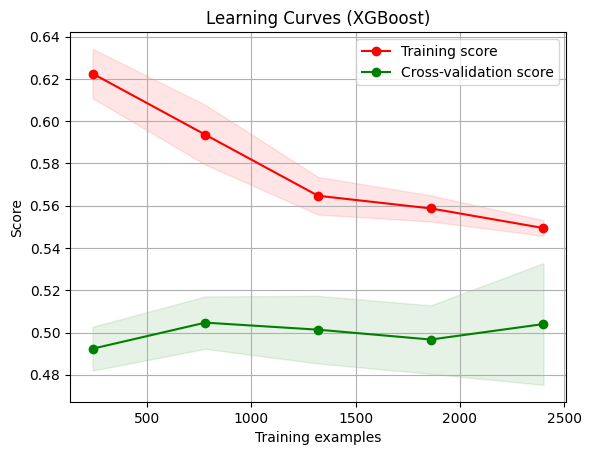

In [16]:
plot_learning_curve(
    model_pipeline, "Learning Curves (XGBoost)", X, y, cv=5)
plt.show()

#### Matriz de Confusão

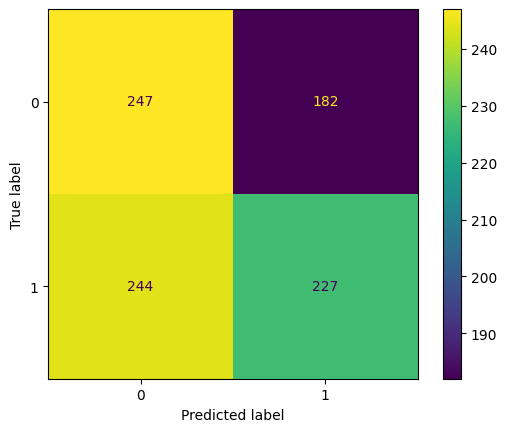

In [17]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
Report

,Classificador,Acurácia treino,Acurácia teste,Validação Cruzada
0,XGBoost,54.43%,52.67%,52.67%


In [19]:
Class_Report

,precision,recall,f1-score,support
0,0.503055,0.575758,0.536957,429.000000
1,0.555012,0.481953,0.515909,471.000000
accuracy,0.526667,0.526667,0.526667,0.526667
macro avg,0.529034,0.528855,0.526433,900.000000
weighted avg,0.530246,0.526667,0.525942,900.000000


In [20]:
y_pred_train

array([0, 1, 0, ..., 1, 0, 1])

In [23]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,